In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir('drive')
os.chdir('MyDrive')
os.chdir('Coursera Project')

Mounted at /content/drive


In [ ]:
# Importing Necessary Libraries
import pandas as pd

In [ ]:
# Loading the transformed data
Company_names = ['Amazon', 'Apple', 'Google', 'Meta', 'Netflix']
company_dict = {}
for i in Company_names:
  df = pd.read_csv(i+'_df.csv')
  df['Date'] = pd.to_datetime(df['Date'])
  company_dict[i]=df.set_index('Date')

In [ ]:
# Importing Necessary Libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Setting up the batch size
batch_size = 64

In [ ]:
# Function for getting the Train, Test, and Vaidation data
def construct_feature_target(df_in, f_len=3, batch_size = 64):
  df = df_in
  df_in = df_in.to_numpy()
  nbatch = len(df_in)//batch_size
  lendf = nbatch*batch_size
  X = df_in[:,:-1]
  y = df_in[:,-1:]
  X = np.reshape(X,(X.shape[0],X.shape[1],1))
  y = np.reshape(y,(y.shape[0],y.shape[1]))
  print(X.shape,y.shape)
  return df.index[0:int(0.8*nbatch)*batch_size], X[0:int(0.8*nbatch)*batch_size],y[0:int(0.8*nbatch)*batch_size], df.index[int(0.8*nbatch)*batch_size:int(0.9*nbatch)*batch_size],X[int(0.8*nbatch)*batch_size:int(0.9*nbatch)*batch_size],y[int(0.8*nbatch)*batch_size:int(0.9*nbatch)*batch_size], df.index[int(0.9*nbatch)*batch_size:int(1*nbatch)*batch_size], X[int(0.9*nbatch)*batch_size:int(1*nbatch)*batch_size],y[int(0.9*nbatch)*batch_size:int(1*nbatch)*batch_size]

In [ ]:
# Getting the Train, Test, and Vaidation data for each company and saving it to a dictionary
df_train = {}
X_train = {}
y_train = {}
df_val = {}
X_val = {}
y_val = {}
df_test = {}
X_test = {}
y_test = {}
for i in Company_names:
  df_train[i], X_train[i], y_train[i], df_val[i], X_val[i], y_val[i], df_test[i],  X_test[i], y_test[i]= construct_feature_target(company_dict[i], f_len=(company_dict[i].shape[1]-1), batch_size=batch_size)

(6464, 10, 1) (6464, 1)
(10624, 10, 1) (10624, 1)
(4608, 10, 1) (4608, 1)
(2688, 10, 1) (2688, 1)
(5184, 10, 1) (5184, 1)


In [ ]:
# Printing the shape Train, Test, and Vaidation data for each company
for i in Company_names:
  print(X_train[i].shape, y_train[i].shape,  X_val[i].shape, y_val[i].shape, X_test[i].shape, y_test[i].shape)

(5120, 10, 1) (5120, 1) (640, 10, 1) (640, 1) (704, 10, 1) (704, 1)
(8448, 10, 1) (8448, 1) (1088, 10, 1) (1088, 1) (1088, 10, 1) (1088, 1)
(3648, 10, 1) (3648, 1) (448, 10, 1) (448, 1) (512, 10, 1) (512, 1)
(2112, 10, 1) (2112, 1) (256, 10, 1) (256, 1) (320, 10, 1) (320, 1)
(4096, 10, 1) (4096, 1) (512, 10, 1) (512, 1) (576, 10, 1) (576, 1)


In [ ]:
# Importing the functions of Keras Library
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Importing Necessary Libraries 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Loading the Trained Stateful LSTM models
load = {}
for i in Company_names:
  load[i]=load_model(i+'_trained_model.h5')

In [ ]:
# Importing the matplotlib.pyplot library
import matplotlib.pyplot as plt

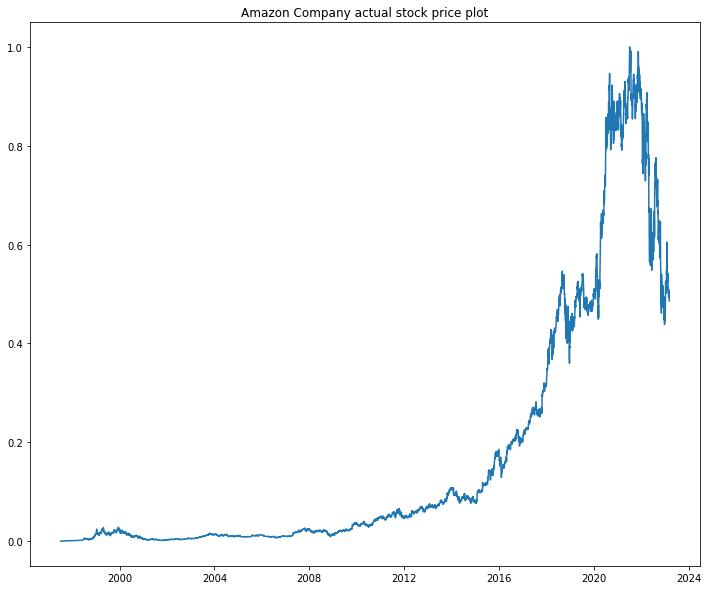

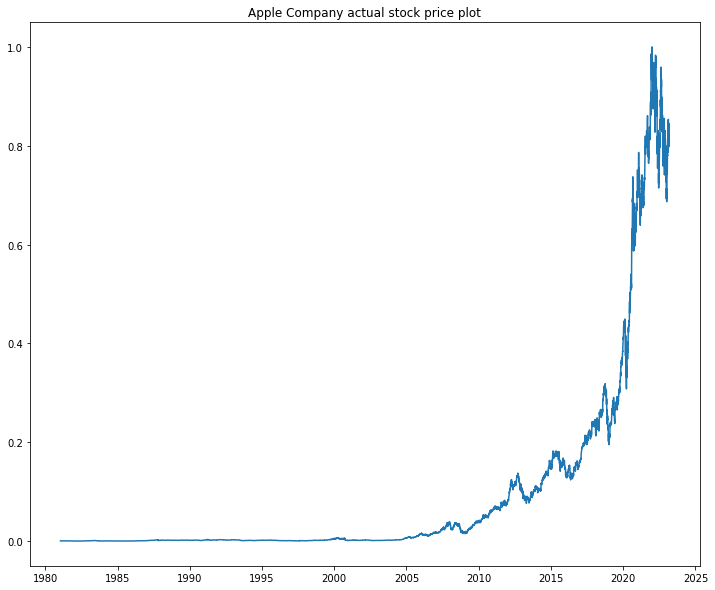

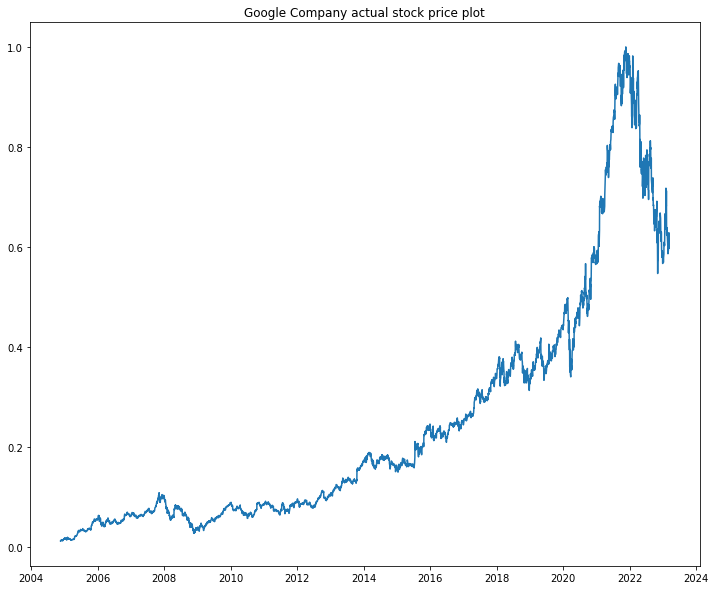

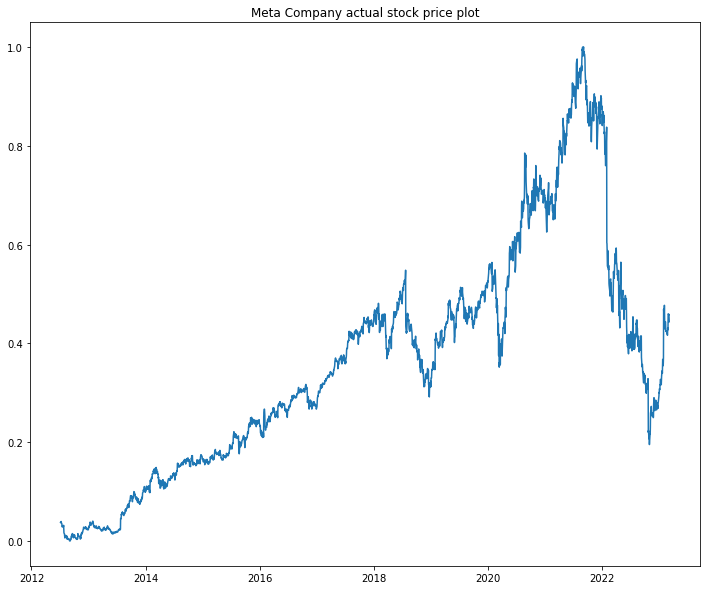

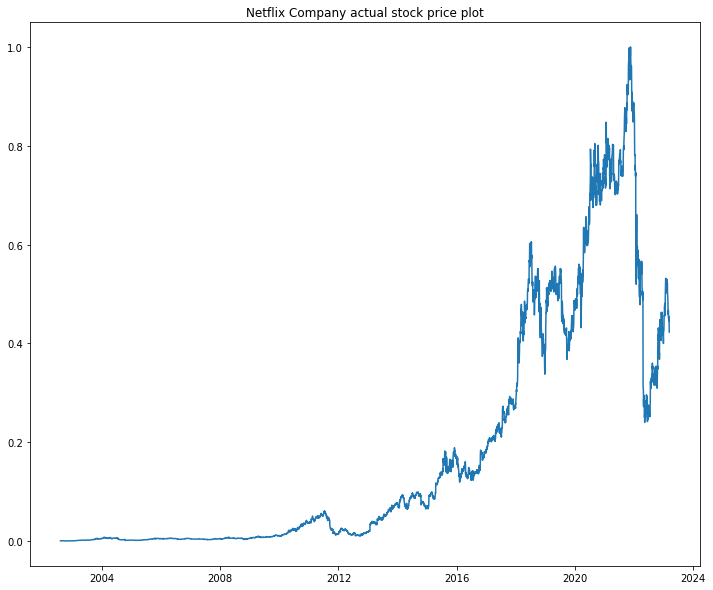

In [ ]:
# Plotting the Scalled Actual Stock Price for Each Company
for i in Company_names:
  length = (company_dict[i].shape[1]-1)+len(company_dict[i])
  plt.figure(figsize=(12, 10))
  plt.title(i+" Company actual stock price plot")
  plt.plot(company_dict[i].index, company_dict[i]["Target"])
  plt.show()

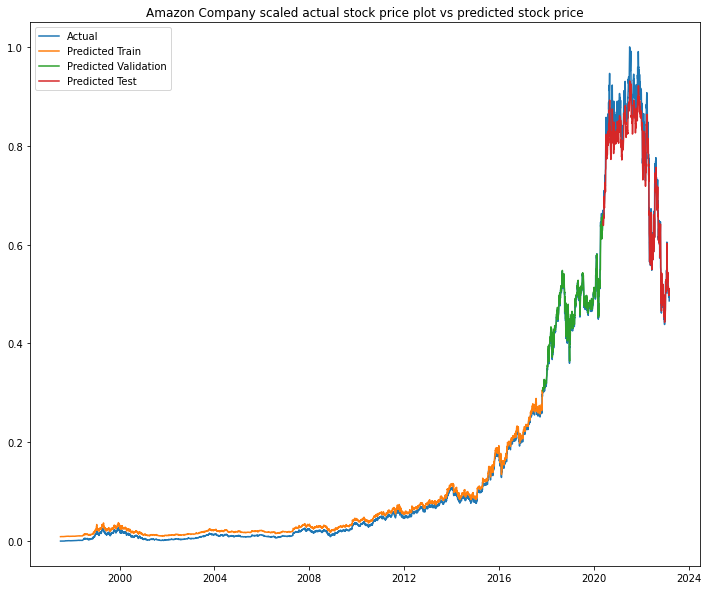

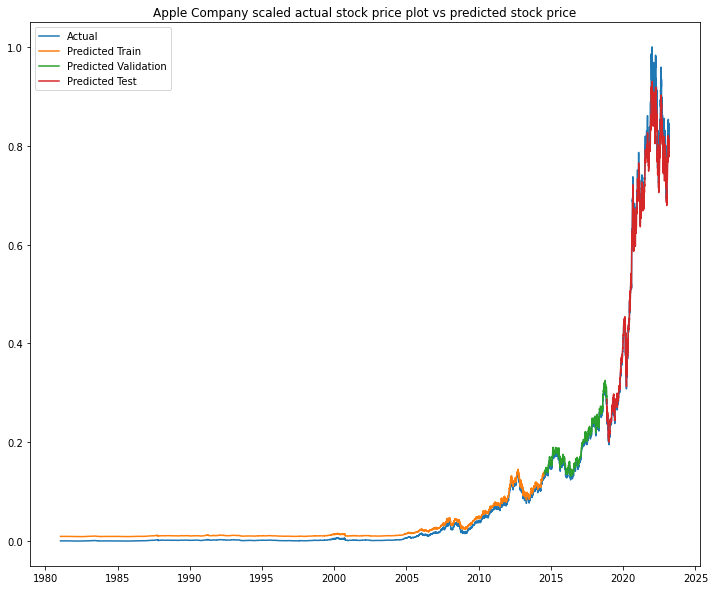

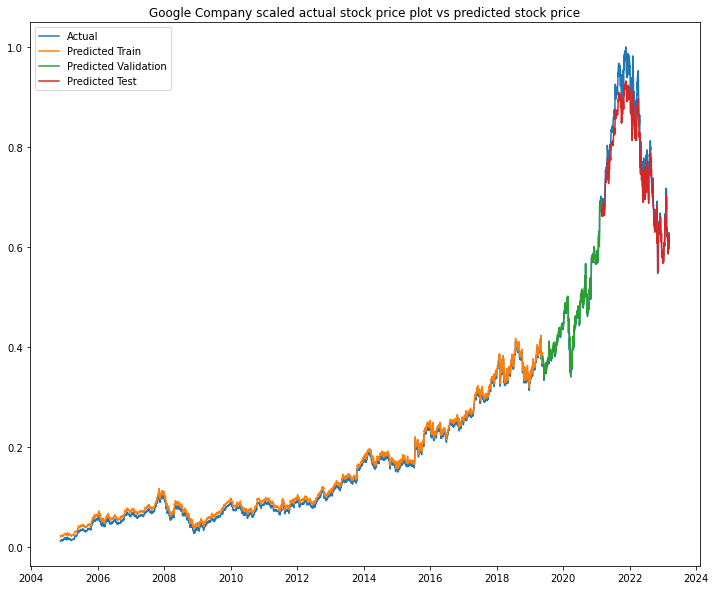

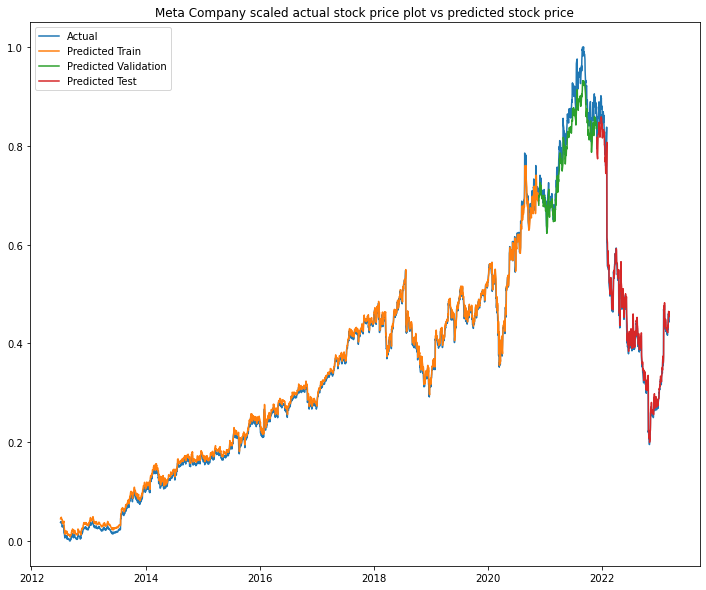

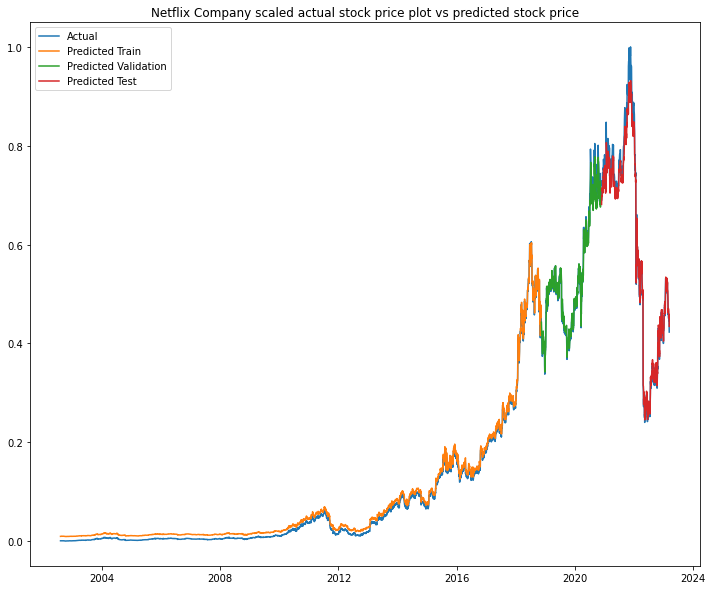

In [ ]:
# Plotting the Scalled Actual Stock Price and Predicted Stock Price for Each Company
for i in Company_names:
  length = (company_dict[i].shape[1]-1)+len(company_dict[i])
  plt.figure(figsize=(12, 10))
  plt.title(i+" Company scaled actual stock price plot vs predicted stock price")
  plt.plot(company_dict[i].index,company_dict[i]["Target"])
  plt.plot(df_train[i],load[i].predict(X_train[i], batch_size = 64, verbose=0))
  plt.plot(df_val[i],load[i].predict(X_val[i], batch_size = 64, verbose=0))
  plt.plot(df_test[i],load[i].predict(X_test[i], batch_size = 64, verbose=0))
  plt.legend(["Actual","Predicted Train","Predicted Validation","Predicted Test"])
  plt.show()